In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/MECE689_Bowling/MECE689_RL_Bowling_Atari/code

/content/drive/MyDrive/MECE689_Bowling/MECE689_RL_Bowling_Atari/code


In [3]:
!pip install stable-baselines3 gymnasium[atari,accept-rom-license] ale-py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.2/187.2 kB 8.5 MB/s eta 0:00:00


In [9]:
import os
import torch
import gymnasium as gym
import stable_baselines3
import ale_py
import numpy as np
from stable_baselines3 import DQN


# Visualization
from PIL import Image
import io
import base64
from IPython.display import display, HTML



# For debugging
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.callbacks import CheckpointCallback
from stable_baselines3.common.callbacks import BaseCallback
import time

# Action masking
# from gymnasium import ActionWrapper

# Vector environment
from stable_baselines3.common.env_util import make_atari_env
from stable_baselines3.common.vec_env import VecFrameStack, VecEnvWrapper

print("All imports working")

All imports working


In [5]:
print("GPU available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU:", torch.cuda.get_device_name(0))


GPU available: False


In [21]:
# Create Bowling environment
env = gym.make("ALE/Bowling-v5", render_mode="human")
observation, info = env.reset()

action_space = env.action_space
action_meanings = env.unwrapped.get_action_meanings()
print(f"Action space: {action_space}")
print("Number of actions:", action_space.n)
print("Action meanings:", action_meanings)

obs_space = env.observation_space
print(f"Observation shape: {observation.shape}")
print(f"Observation space: {obs_space}")

# Action space: Discrete(6)
# Number of actions: 6
# Action meanings: ['NOOP', 'FIRE', 'UP', 'DOWN', 'UPFIRE', 'DOWNFIRE']
# Observation shape: (210, 160, 3)
# Observation space: Box(0, 255, (210, 160, 3), uint8)

# ACTIONS:
# 0: NOOP
# 1: FIRE
# 2: UP
# 3: DOWN
# 4: UPFIRE
# 5: DOWNFIRE

env.close()
print("Bowling env closed")

Action space: Discrete(6)
Number of actions: 6
Action meanings: ['NOOP', 'FIRE', 'UP', 'DOWN', 'UPFIRE', 'DOWNFIRE']
Observation shape: (210, 160, 3)
Observation space: Box(0, 255, (210, 160, 3), uint8)
Bowling env closed


In [26]:
def convert(seconds):
    seconds = seconds % (24 * 3600)
    hour = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60

    return "%d:%02d:%02d" % (hour, minutes, seconds)

In [11]:
# Show the first frame as an image
def show_frame(obs):
    # Convert to PIL Image and display
    img = Image.fromarray(obs)
    display(img)

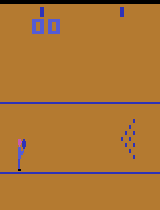


Testing actions:
Training phase started.
Step 424: Reward: 3.0


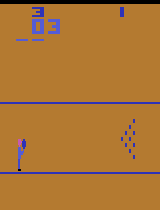

Step 640: Reward: 3.0


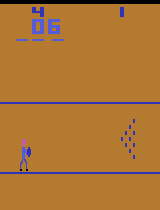

Step 849: Reward: 3.0


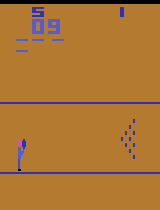

Step 1064: Reward: 3.0


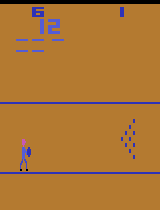

Step 1272: Reward: 3.0


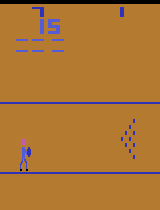

Step 1479: Reward: 6.0


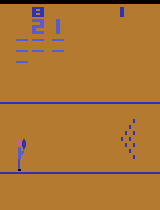

Step 1692: Reward: 3.0


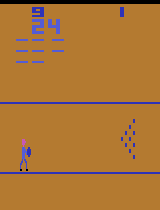

Step 2108: Reward: 3.0


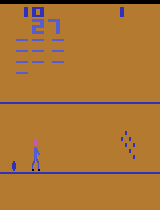

Game ended!
Training phase completed!

Total steps taken: 2108
Time taken: 0:00:00


In [30]:
env = gym.make("ALE/Bowling-v5", render_mode=None)
observation, info = env.reset()
show_frame(observation)

# Test a few actions
print("\nTesting actions:")
total_timesteps = 9999

print("Training phase started.")
start_time = time.time()
for step in range(total_timesteps):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    if reward > 0:
      print(f"Step {step}: Reward: {reward}")
      show_frame(observation)


    if terminated or truncated:
        print("Game ended!")
        break

end_time = time.time()
print("Training phase completed!\n")
env.close()
print(f"Total steps taken: {step}")
# Calculate run time
training_duration = end_time - start_time
time_in_minutes_and_seconds = convert(training_duration)
print(f"Time taken: {time_in_minutes_and_seconds}")
# print(f"Speed: {total_timesteps/training_duration:.2f} steps/second")